In [ ]:
from google.colab import drive #to mount gdrive on collab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
import glob 

path = '/content/drive/My Drive/archive/' #to load file path to collab
files = glob.glob(path + "/*.csv")

In [ ]:
df_tweet = pd.DataFrame() 
for file in files: #append all files ie 2017,2018,2019,2020,2021 and 2022 together
  df_temp = pd.read_csv(file)
  df_tweet = df_tweet.append(df_temp, ignore_index=True)
df_tweet

Unnamed: 0                  id     conversation_id       created_at  \
0             0.0         15434727182         15434727182  1275676317000.0   
1             0.0  152153637639028736  152151847614943233  1325111228000.0   
2             1.0  151809315026636800  151809315026636800  1325029135000.0   
3             2.0  151338939389706242  151338939389706242  1324916990000.0   
4             3.0  151337237429239808  151337237429239808  1324916584000.0   
...           ...                 ...                 ...              ...   
34873     11712.0  142881284019060736  142881284019060736  1322900527000.0   
34874     11713.0  142880871391838208  142880871391838208  1322900428000.0   
34875     11714.0  142188458125963264  142188458125963264  1322735344000.0   
34876     11715.0  142179928203460608  142179928203460608  1322733311000.0   
34877     11716.0         15434727182         15434727182  1275676317000.0   

                      date  timezone  place  \
0      2010-06-04 18:31:57         0    NaN   
1      2011-12-28 22:27:08         0    NaN   
2      2011-12-27 23:38:55         0    NaN   
3      2011-12-26 16:29:50         0    NaN   
4      2011-12-26 16:23:04         0    NaN   
...                    ...       ...    ...   
34873  2011-12-03 08:22:07         0    NaN   
34874  2011-12-03 08:20:28         0    NaN   
34875  2011-12-01 10:29:04         0    NaN   
34876  2011-12-01 09:55:11         0    NaN   
34877  2010-06-04 18:31:57         0    NaN   

                                                   tweet language hashtags  \
0      Please ignore prior tweets, as that was someon...       en       []   
1                                   @TheOnion So true :)       en       []   
2      If you ever wanted to know the *real* truth ab...       en       []   
3      Walked around a neighborhood recently rebuilt ...       en       []   
4      It was Xmas, so we brought presents for the ki...       en       []   
...                                                  ...      ...      ...   
34873                  That was a total non sequitur btw       en       []   
34874  Great Voltaire quote, arguably better than Twa...       en       []   
34875  I made the volume on the Model S  http://t.co/...       en       []   
34876  Went to Iceland on Sat to ride bumper cars on ...       en       []   
34877  Please ignore prior tweets, as that was someon...       en       []   

       ... reply_to  retweet_date  translate trans_src trans_dest  time  \
0      ...       []           NaN        NaN       NaN        NaN   NaN   
1      ...       []           NaN        NaN       NaN        NaN   NaN   
2      ...       []           NaN        NaN       NaN        NaN   NaN   
3      ...       []           NaN        NaN       NaN        NaN   NaN   
4      ...       []           NaN        NaN       NaN        NaN   NaN   
...    ...      ...           ...        ...       ...        ...   ...   
34873  ...       []           NaN        NaN       NaN        NaN   NaN   
34874  ...       []           NaN        NaN       NaN        NaN   NaN   
34875  ...       []           NaN        NaN       NaN        NaN   NaN   
34876  ...       []           NaN        NaN       NaN        NaN   NaN   
34877  ...       []           NaN        NaN       NaN        NaN   NaN   

       mentions replies_count retweets_count likes_count  
0           NaN           NaN            NaN         NaN  
1           NaN           NaN            NaN         NaN  
2           NaN           NaN            NaN         NaN  
3           NaN           NaN            NaN         NaN  
4           NaN           NaN            NaN         NaN  
...         ...           ...            ...         ...  
34873       NaN           NaN            NaN         NaN  
34874       NaN           NaN            NaN         NaN  
34875       NaN           NaN            NaN         NaN  
34876       NaN           NaN            NaN         NaN  
34877       NaN   

In [ ]:
import datetime
df_tweet['Year'] = pd.DatetimeIndex(df_tweet['date']).year #to add year column in the data frame
df_tweet.head()
l=[t.lower() for t in df_tweet['tweet']]
df_tweet['tweet']=l

In [ ]:
df_tweet_2017 = df_tweet[(df_tweet.Year == 2017)] #to create data frame of the tweets belonging to year 2017
df_tweet_2018 = df_tweet[(df_tweet.Year == 2018)] #to create data frame of the tweets belonging to year 2018
df_tweet_2019 = df_tweet[(df_tweet.Year == 2019)] #to create data frame of the tweets belonging to year 2019
df_tweet_2020 = df_tweet[(df_tweet.Year == 2020)] #to create data frame of the tweets belonging to year 2020
df_tweet_2021 = df_tweet[(df_tweet.Year == 2021)] #to create data frame of the tweets belonging to year 2021
df_tweet_2022 = df_tweet[(df_tweet.Year == 2022)] #to create data frame of the tweets belonging to year 2022

In [ ]:
def tw(x): #function to combine all tweets in a given year
  all_tweets=''
  for tweet in x['tweet']:
    all_tweets += tweet + ' '
  return all_tweets

In [ ]:
tweet_2017 = tw(df_tweet_2017) #all tweets for the year 2017
tweet_2018 = tw(df_tweet_2018) #all tweets for the year 2018
tweet_2019 = tw(df_tweet_2019) #all tweets for the year 2019
tweet_2020 = tw(df_tweet_2020) #all tweets for the year 2020
tweet_2021 = tw(df_tweet_2021) #all tweets for the year 2021
tweet_2022 = tw(df_tweet_2022) #all tweets for the year 2022

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def word_filter(x): #function to filter stopwords from tweets
  words = word_tokenize(x)
  stop_words = set(stopwords.words('english'))
  stop_words.update(['@', '.', ':', ';', '&', 'I', ',', 'A', '!', '’', ')', '(', '🤣', '?', 'We', 'In', 'It','The', '“', '”', 'This', 'If','https','\'s','n\'t','...','3','🤣🤣','…'])
  words_filtered = []
  for word in words:
    if word not in stop_words:
      words_filtered.append(word)
  return words_filtered


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**1. Word Frequencies for Each Year**

In [ ]:
tweet_2017_freq = nltk.FreqDist(word_filter(tweet_2017)) #to find frequency of words in a given tweet
tweet_2018_freq = nltk.FreqDist(word_filter(tweet_2018)) #to find frequency of words in a given tweet
tweet_2019_freq = nltk.FreqDist(word_filter(tweet_2019)) #to find frequency of words in a given tweet
tweet_2020_freq = nltk.FreqDist(word_filter(tweet_2020)) #to find frequency of words in a given tweet
tweet_2021_freq = nltk.FreqDist(word_filter(tweet_2021)) #to find frequency of words in a given tweet
tweet_2022_freq = nltk.FreqDist(word_filter(tweet_2022)) #to find frequency of words in a given tweet

In [ ]:
tweet_2017_freq.tabulate(10) #Word Frequencies for 2017

   amp  tesla  model    yes   good spacex   like    one  first   next 
   267    240    177    162    159    156    147    138    126    123 


In [ ]:
tweet_2018_freq.tabulate(10) #Word Frequencies for 2018

   amp  tesla    car    yes   good  model   like spacex  would people 
  1581   1354    360    324    305    294    282    264    231    222 


In [ ]:
tweet_2019_freq.tabulate(10) #Word Frequencies for 2019

         tesla            amp erdayastronaut         spacex        flcnhvy            yes          would          great  teslaownerssv       starship 
          1130            970            520            429            364            307            198            193            182            181 


In [ ]:
tweet_2020_freq.tabulate(10) #Word Frequencies for 2020

           amp          tesla erdayastronaut        flcnhvy       ppathole         spacex            yes          great  thirdrowtesla           much 
           578            347            247            239            225            207            160            128            123            120 


In [ ]:
tweet_2021_freq.tabulate(10) #Word Frequencies for 2021

           amp          tesla         spacex  wholemarsblog  teslaownerssv       ppathole erdayastronaut          great           good           much 
           476            327            237            189            119            116            111            102             98             93 


In [ ]:
tweet_2022_freq.tabulate(10) #Word Frequencies for 2022

        tesla wholemarsblog           amp        spacex teslaownerssv sawyermerritt        people         would           yes           one 
          108            84            80            58            50            36            34            32            32            30 


**2. Top 10 words (for each year) by the highest value of Word Frequency:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def frequency_plot(x): #function to plot frequency plot
  t=pd.DataFrame(x.most_common(),columns=['Key','value'])
  sns.histplot(t['value'],bins=100)
  plt.xlabel("Words")
  plt.ylabel("Frequency")

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
frequency_plot(tweet_2017_freq) #Frequency Plot for 2017 using frequency_plot function
plt.title("2017")
plt.subplot(3,2,2)
frequency_plot(tweet_2018_freq) #Frequency Plot for 2018 using frequency_plot function
plt.title("2018")
plt.subplot(3,2,3)
frequency_plot(tweet_2019_freq) #Frequency Plot for 2019 using frequency_plot function
plt.title("2019")
plt.subplot(3,2,4)
frequency_plot(tweet_2020_freq) #Frequency Plot for 2020 using frequency_plot function
plt.title("2020")
plt.subplot(3,2,5)
frequency_plot(tweet_2021_freq) #Frequency Plot for 2021 using frequency_plot function
plt.title("2021")
plt.subplot(3,2,6)
frequency_plot(tweet_2022_freq) #Frequency Plot for 2022 using frequency_plot function
plt.title("2022")

Text(0.5, 1.0, '2022')

**3. Histogram of Word Frequencies for Each Year**

In [ ]:
import scipy.stats as ss
import math
def log_plot(x): #to generate log-log plot
  temp_df2=pd.DataFrame(x.most_common(),columns=['Word','Count']) # Generating a dataframe with the word count 
  temp_df2['rank']=range(1,temp_df2.shape[0]+1)                   # as the wor and rand counts are sorted in descending order creating a rank variable 
  plt.loglog(temp_df2['rank'], temp_df2['Count'])                 # Using log log to plot the log plots
  plt.xlabel('Rank')
  plt.ylabel('Word Frequency')

Text(0.5, 1.0, '2022')

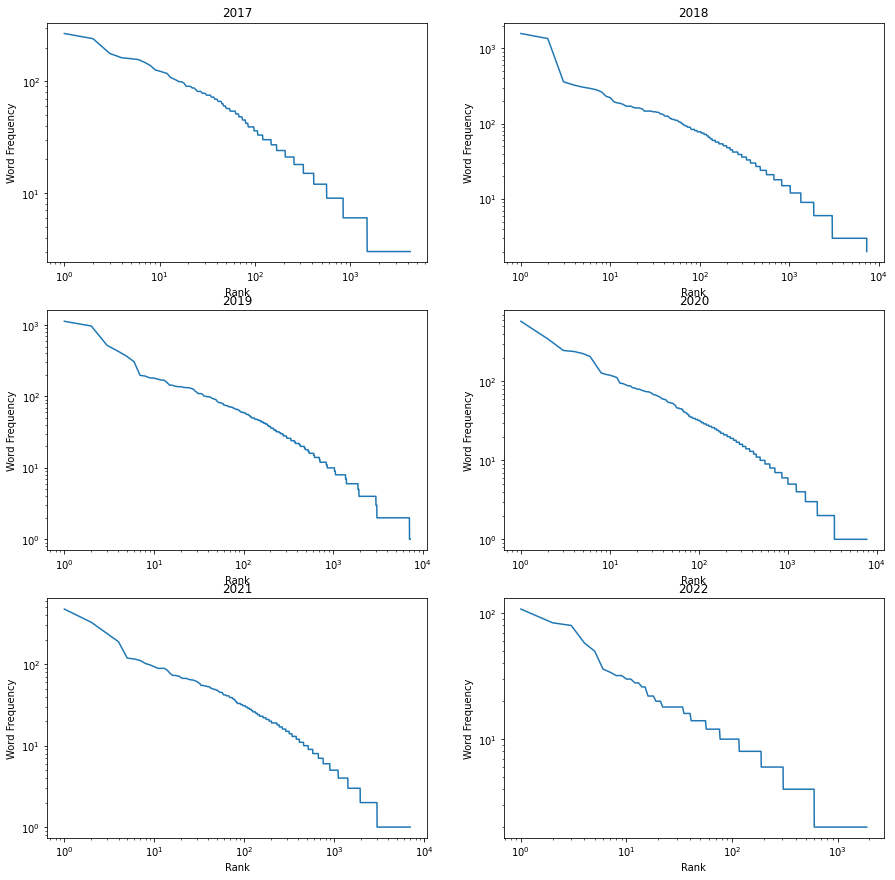

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
log_plot(tweet_2017_freq)
plt.title('2017') #log-log plot for 2017
plt.subplot(3,2,2)
log_plot(tweet_2018_freq)
plt.title('2018') #log-log plot for 2018
plt.subplot(3,2,3)
log_plot(tweet_2019_freq)
plt.title('2019') #log-log plot for 2019
plt.subplot(3,2,4)
log_plot(tweet_2020_freq)
plt.title("2020") #log-log plot for 2020
plt.subplot(3,2,5)
log_plot(tweet_2021_freq)
plt.title("2021") #log-log plot for 2021
plt.subplot(3,2,6)
log_plot(tweet_2022_freq) #log-log plot for 2022
plt.title("2022")

In [ ]:
pip install networkx==2.6.3 #to install networkx library version 2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


In [ ]:
import networkx as nx
def bigram_graph(x): #function to generate bigrams for top 200 words
  from nltk.corpus import stopwords
  stoplist = stopwords.words('english') + ['@', '.', ':', ';', '&', 'I', ',', 'A', '!', '’', ')', '(', '🤣', '?', 'We', 'In', 'It','The', '“', '”', 'This', 'If','https','\'s','n\'t','...','3','🤣🤣','…'] 
  # Generating list of stop words

  c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3)) # Creating a bi gram matrx
  ngrams = c_vec.fit_transform(x['tweet'])
  count_values = ngrams.toarray().sum(axis=0)
  vocab = c_vec.vocabulary_
  df_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
  # SPlitting the bigram dataframe and 
  bi_1=[]
  bi_2=[]
  for i in range(0, len(df_bigram)): # Iterating through the bigrams and splitting into seprate lists to create a dataframe with the bugrams and frequency
    l=df_bigram['bigram'][i].split()
    bi_1.append(l[0])
    bi_2.append(l[1])
  df_bigram['bi_1']=bi_1        # Assigning the list to a new column in the bigram df
  df_bigram['bi_2']=bi_2
  df_bigram.drop('bigram',axis=1,inplace=True)     # Dropping the previouslt assinged bigram matrix
  df_bigram=df_bigram.iloc[:200]
  g = nx.from_pandas_edgelist(df_bigram, source='bi_1', target='bi_2',edge_attr='frequency')
  nx.draw_random(g,with_labels=True)
  plt.gcf().set_size_inches(15, 15)
  plt.show()  

In [ ]:
bigram_graph(df_tweet_2017) #bigram for year 2017

In [ ]:
bigram_graph(df_tweet_2018) #bigram for year 2018

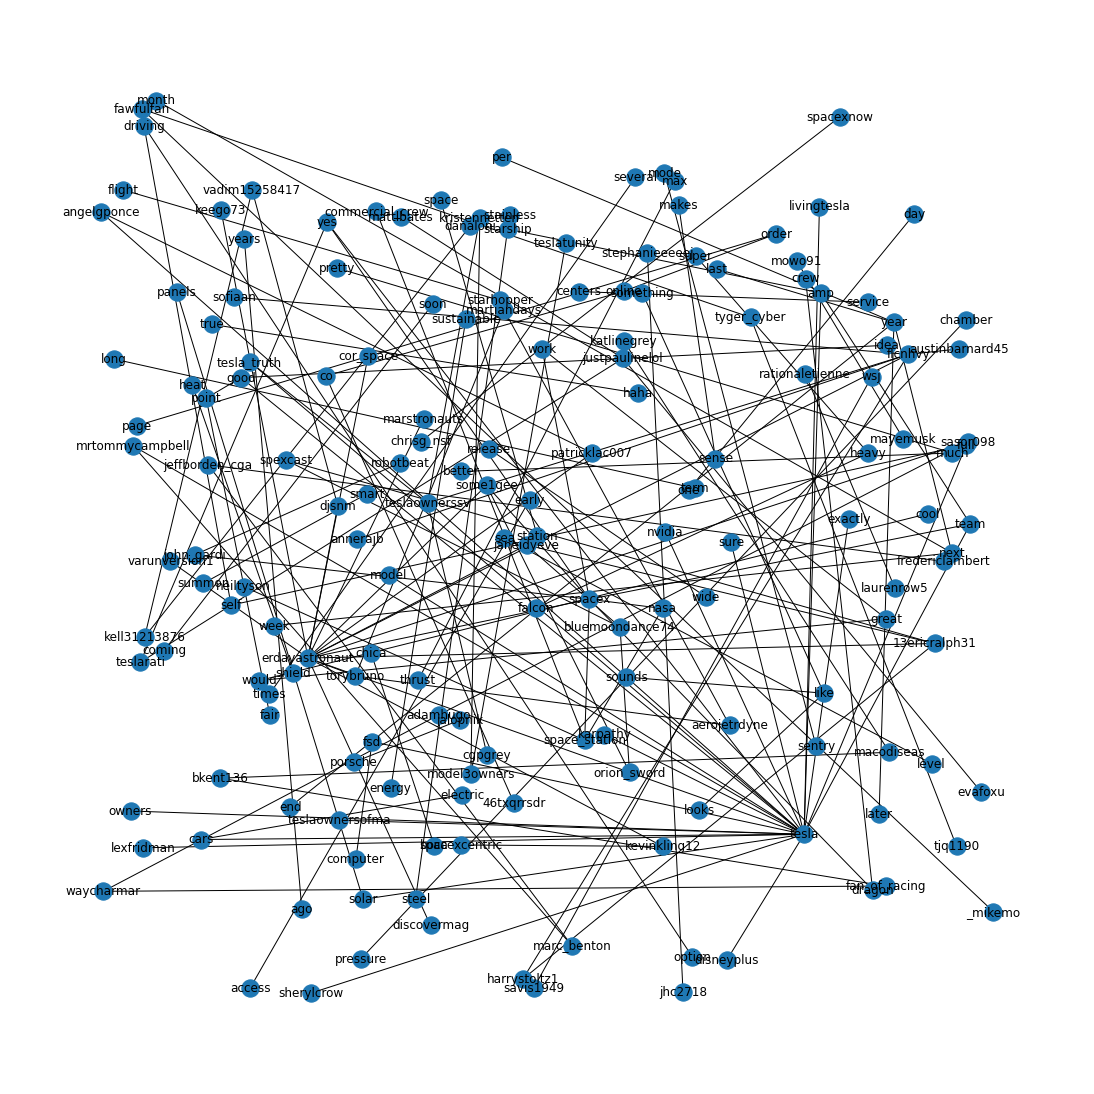

In [ ]:
bigram_graph(df_tweet_2019) #bigram for year 2019

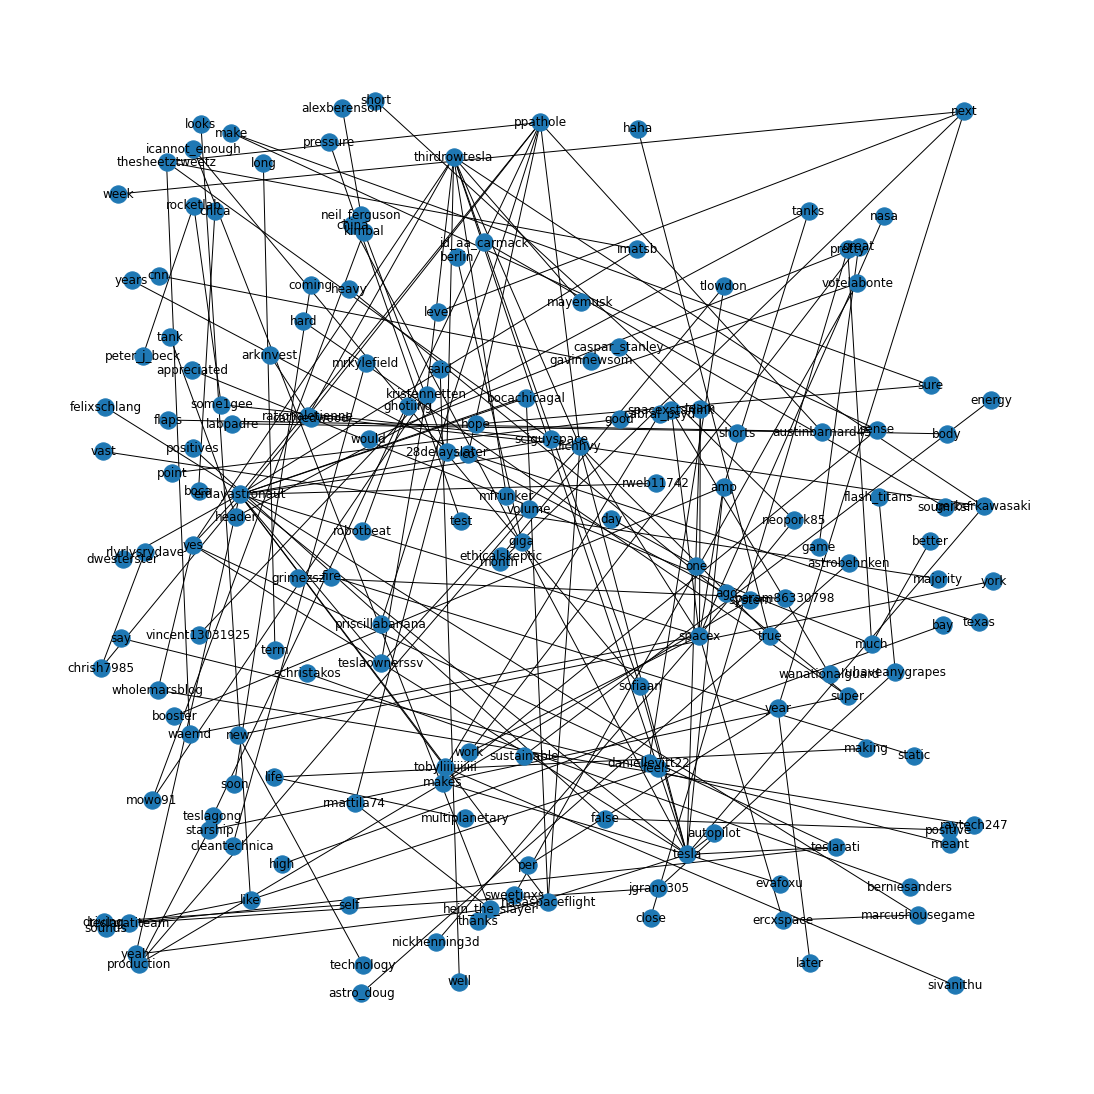

In [ ]:
bigram_graph(df_tweet_2020) #bigram for year 2020

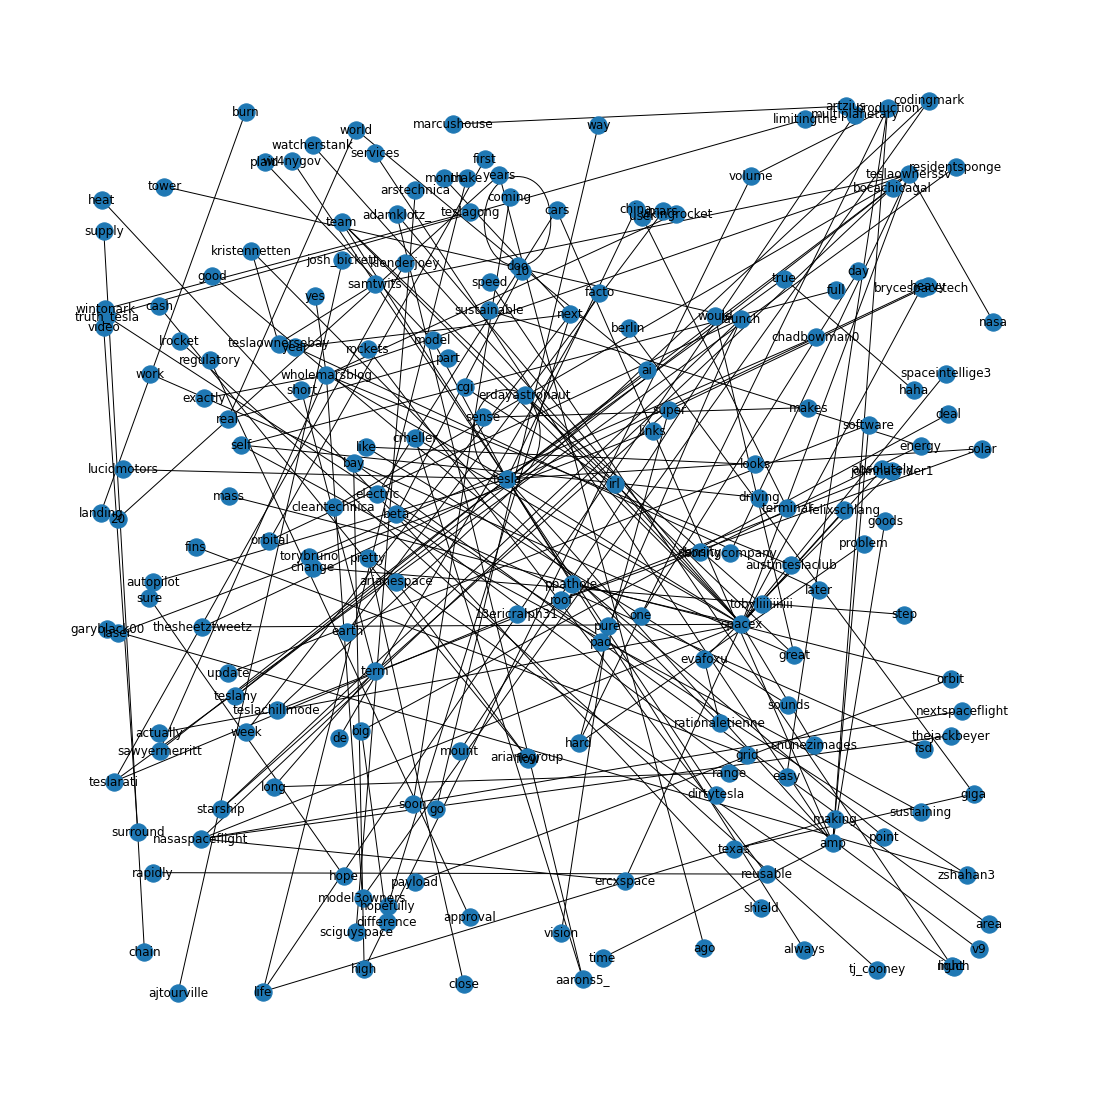

In [ ]:
bigram_graph(df_tweet_2021) #bigram for year 2021

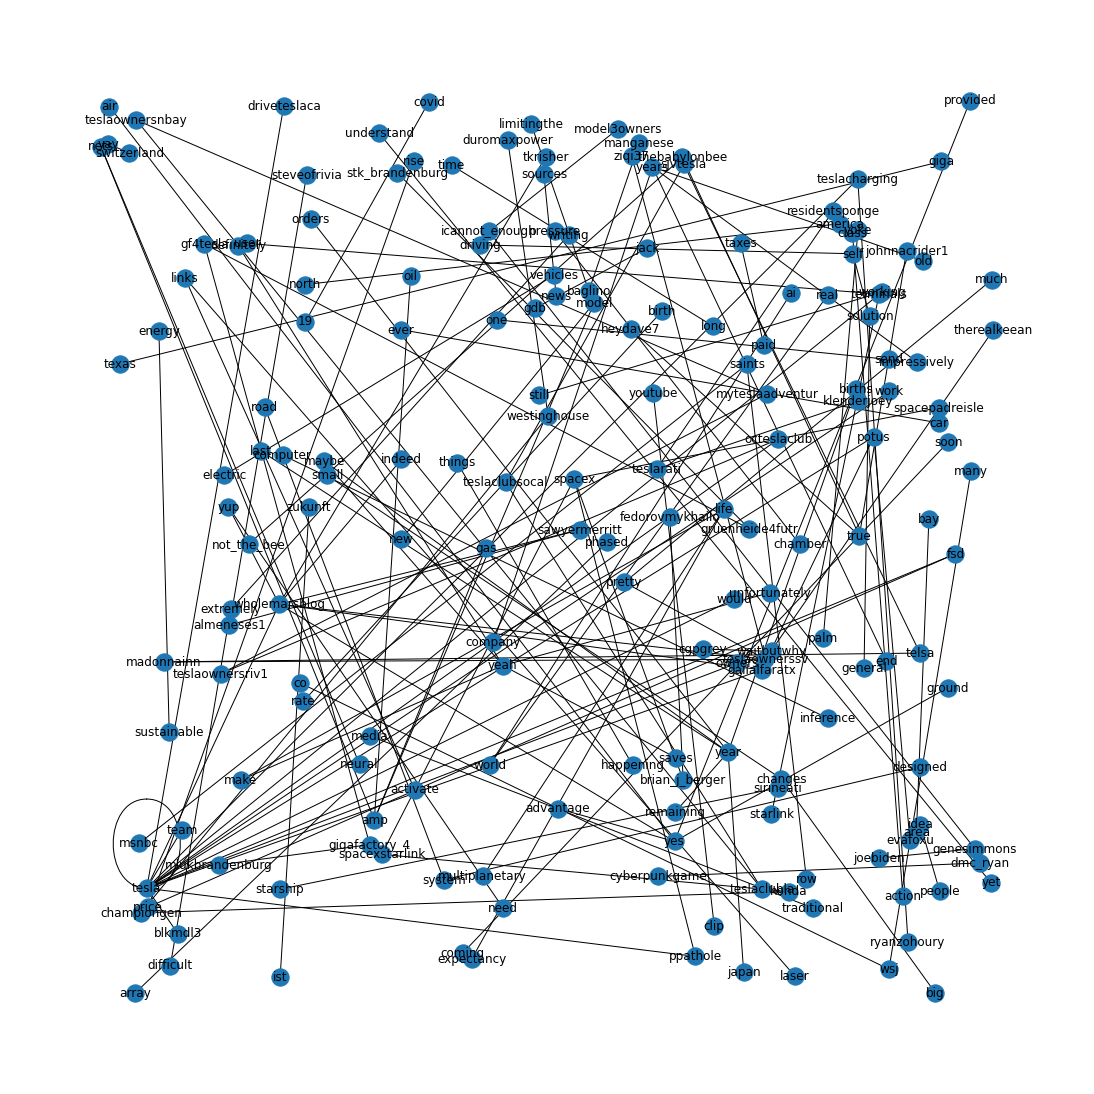

In [ ]:
bigram_graph(df_tweet_2022) #bigram for year 2022

In [1]:
!jupyter nbconvert -- to html Group_53_Project_3_task2.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook Group_53_Project_3_task2.ipynb to html
[NbConvertApp] Writing 5962949 bytes to Group_53_Project_3_task2.html
